In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [21]:
df = pd.read_csv('../data/query_output/query_new_4_updated.csv')
df.head()

,QUERY,COUNTS
0,-,970227
1,google,302390
2,ebay,126592
3,yahoo,118891
4,yahoo.com,88941


In [22]:
# Filter rows based on the length of the 'QUERY' column, excluding NaN values
df_filtered = df[df['QUERY'].apply(lambda x: len(str(x)) if pd.notna(x) else 0) > 1]

len(df_filtered)

10365

In [24]:
df_filtered.head(10)

,QUERY,COUNTS
1,google,302390
2,ebay,126592
3,yahoo,118891
4,yahoo.com,88941
5,mapquest,80495
6,google.com,72814
7,myspace.com,71079
8,myspace,69040
9,www.yahoo.com,39057
10,www.google.com,38853


In [25]:
# Convert DataFrame to dictionary
word_count = dict()

def save_to_dic(key, value):
    if key in word_count.keys():
        word_count[key] = word_count[key] + value
    else:
        word_count[key] = value

In [26]:
for index, row in df_filtered.iterrows():
    query = row.QUERY
    value = row.COUNTS
    
    # Split the string using both '.' and ' ' as delimiters
    keys = re.split(r'\.|\s', query)
    
    for key in keys:
        save_to_dic(key, value)

In [27]:
df_new = pd.DataFrame(list(word_count.items()), columns=['Query', 'Count'])
df_new.head()

,Query,Count
0,google,464015
1,ebay,174201
2,yahoo,326006
3,com,1526316
4,mapquest,104096


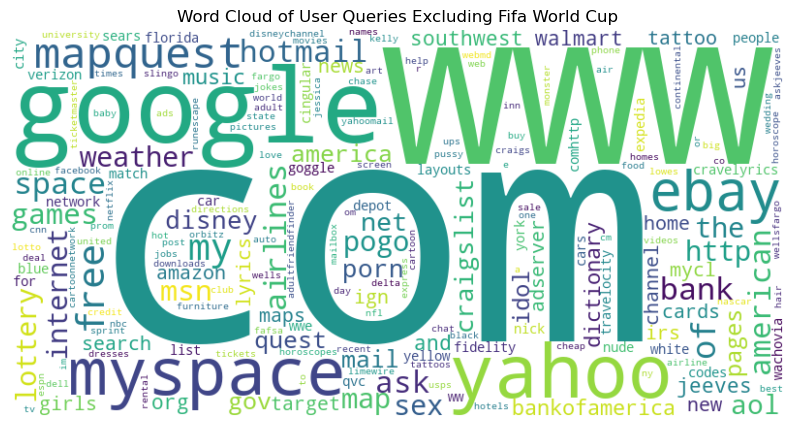

In [30]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of User Queries Excluding Fifa World Cup')

plt.savefig('../Visuals/plots/query_4.png', bbox_inches='tight', dpi=300)

plt.show()